In [3]:
print(1)

1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import re

pd.set_option('display.max_columns', None)

In [5]:
df_raw = pd.read_excel(r"Data.xlsx")
df_raw.head()

,Timestamp,Branch,Year?,Does your degree have a specialization?,1. Class Notes?,2. DA?,3. CGPA,4. Number of Backlogs?,5. Average Attendance? (%),6. FFCS prep,7. Exam Prep,8. Active member of Clubs/Chapters/Teams/Anything that involved Night-slips or ODs( events etc)?,9. Number of events participated in like Hackathons/Ideathons / Events related to my degree or career?,10. What's the perfect seat for your?,11. Bond with teachers.,12. Study sources?,13. Any disciplinary action?,14. Hanging out with friends after classes?,15. Sleep and Exercise?,16. Study location?,17. Room type( dayscholar/ single bed/4bed/6bed etc)
0,2025-05-04 21:48:31,IT,4th year,Nope,"One notebook for all subjects. ""If I feel like...",5+ instances where submission was done one day...,7.85,5.0,7,I choose slots on the day of FFCS and hope the...,I download the syllabus one day before. [Last ...,"Yes, I just want OD",2.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",Yes,I exhaust my outing time and I wish there was ...,8+ hours | Exercise regularly,Room,6.0
1,2025-05-04 21:50:20,CSE (and its spl),4th year,Yep,What notes? [no notes maintained],Login: 11:55 => Submit: 11:59 [Saved in time],9.15,0.0,3,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, but I compensate for my academics somehow.",2.0,"If there is something beyond last bench, I'd c...",They wouldn't recognize me at all.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,2.0
2,2025-05-04 21:51:01,ECE (and its spl),4th year,Yep,I carry 3 pens to class. [Pro level notes],I panic if it's not done by 11pm. [On time],9.1,1.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, but I compensate for my academics somehow.",2.0,First/second bench,They'd notice if I didn't attend the class.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,4.0
3,2025-05-04 21:51:21,ECE (and its spl),4th year,Yep,I make notes that I can understand. [Well main...,I panic if it's not done by 11pm. [On time],8.65,2.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, I want to gain experience.",10.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",No,30min - 1hr on somedays,6-8 hours | Exercise a few times a week,Library,4.0
4,2025-05-04 21:52:27,EEE/EIE (and its spl),4th year,Nope,"One notebook for all subjects. ""If I feel like...",Login: 11:55 => Submit: 11:59 [Saved in time],7.38,0.0,8,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, I want to gain experience.",10.0,Somewhere in the middle,They'd notice if I didn't attend the class.,"Important topic slides, youtube, books",No,I exhaust my outing time and I wish there was ...,4-6 hours | Occasionally exercise,Room,2.0


In [6]:
def df_cleaning(df):
    df.rename(columns={
    'Year?':'year',
     'Does your degree have a specialization?':"spl",
     '1. Class Notes?':"class_notes",
     '2. DA?':"da",
     '3. CGPA':"cgpa",
     '4. Number of Backlogs?':'backlogs',
     '5. Average Attendance? (%)':"attendance",
     '6. FFCS prep':"ffcs",
      '7. Exam Prep':"exam_prep",
      '8. Active member of Clubs/Chapters/Teams/Anything that involved Night-slips or ODs( events etc)?':"clubs_chapters",
      '9. Number of events participated in like Hackathons/Ideathons / Events related to my degree or career?':"competitions",
      "10. What's the perfect seat for your?":"seating_arrangement",
      '11. Bond with teachers.':"bond_teachers",
      '12. Study sources?':"study_material",
      '13. Any disciplinary action?':"disciplinary_action",
       '14. Hanging out with friends after classes?':"social_life",
       '15. Sleep and Exercise?':"lifestyle",
        '16. Study location?': "study_location",
        '17. Room type( dayscholar/ single bed/4bed/6bed etc)':"room_type"

    }, inplace=True)
    def clean_gpa(gpa):
        gpa = gpa.strip()
        s =  re.findall(r"\d| \d.\d|\d.\d\d", gpa)
        i = float((s[0] if isinstance(s,list) else s) if s else "-1")
        # i = float(.join(s).strip())
        # print(i)
        return i
    df['cgpa'] = df['cgpa'].apply(lambda x: x if (isinstance(x,float) or isinstance(x,int)) else clean_gpa(x))
    df = df.loc[(df['cgpa']>0) & (df['cgpa']<=10)].copy()
    df.drop(['Timestamp'], axis='columns', inplace=True)
    cat = [col for col in df_raw.columns if df_raw[col].dtype=='O']
    df[cat]= df[cat].fillna("Not Answered")
    num = [col for col in df.columns if col not in cat]
    df[num]= df[num].fillna(-1)
    df['cgpa_bool'] = df['cgpa'].apply(lambda x: "9-pointer" if x>=9 else "Non-9-pointer")
    df['attendance']=df['attendance'].apply(lambda x: f"{x*10}%")

    return df


In [7]:
df_preprocessed = df_cleaning(df_raw)

# Intro to data

- Branch
- year
- spl

# Academics:
- da
- backlogs
- exam_prep
- study_material

# Class Habits

- class_notes
- attendance
- ffcs
- seating_arrangement
- study_location

# Extra-Curricular

- clubs_chapters
- competitions

# Social

- bond_teachers
- disciplinary_action
- social_life
- lifestyle
- room_type

In [8]:
cat = [col for col in df_preprocessed.columns if df_preprocessed[col].dtype=='O']

C:\Users\anush\AppData\Local\Temp\ipykernel_13864\3690286503.py:25: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


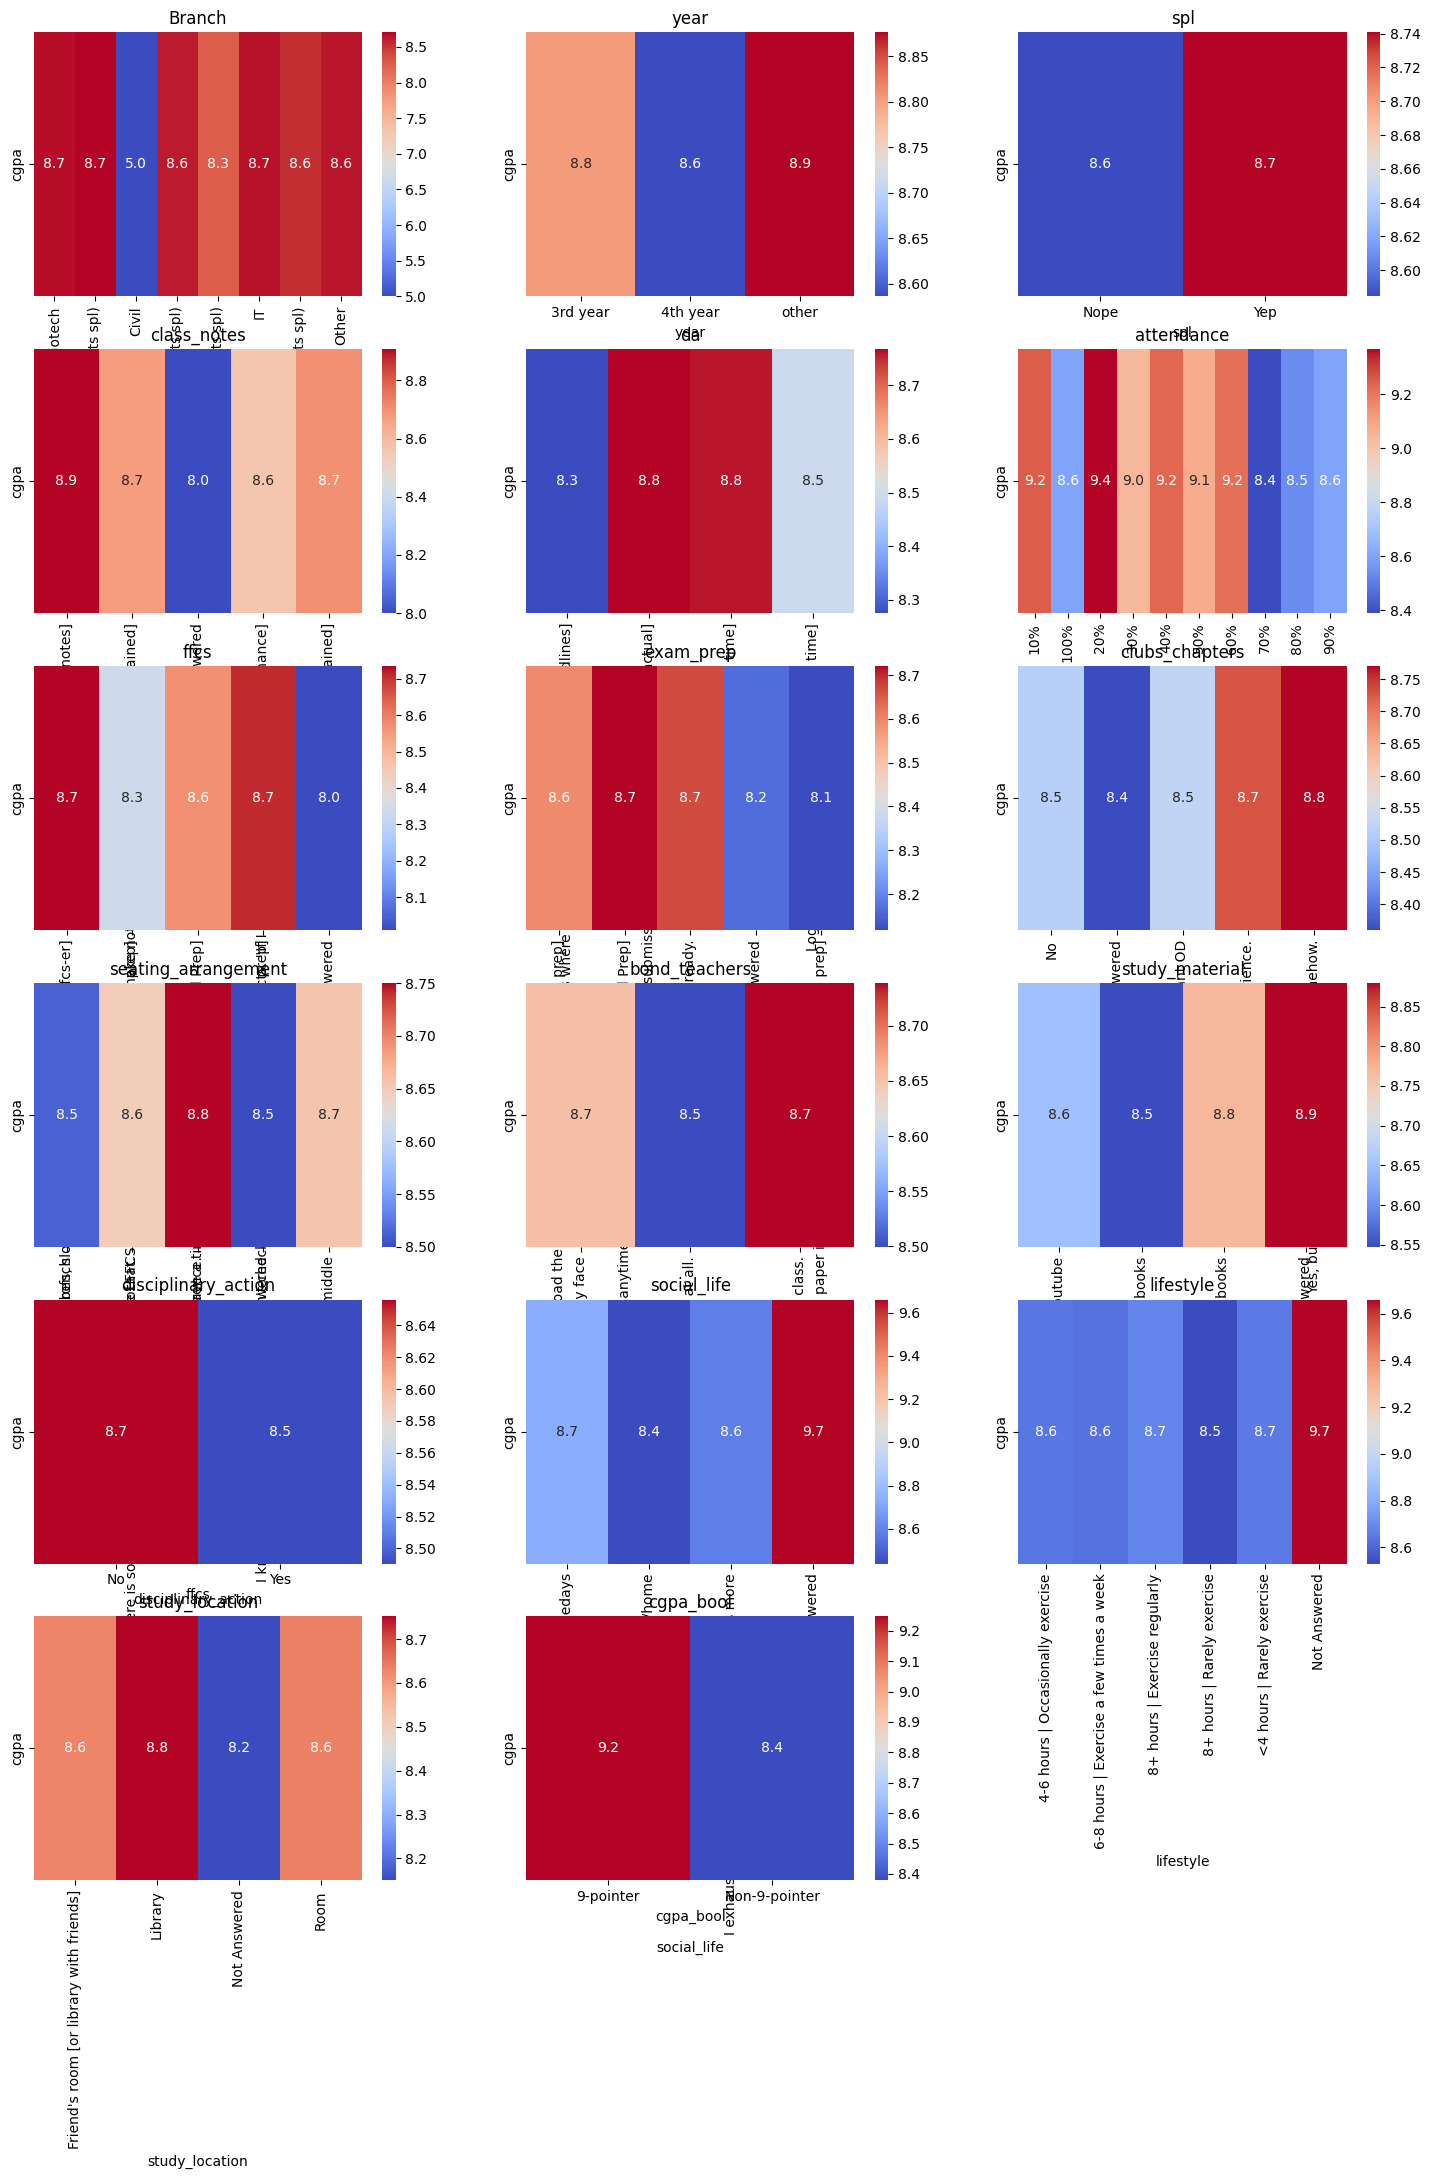

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Suppose cat is your list of categorical columns
# cat = ['cat1','cat2','cat3','cat4','cat5', ...]

n = len(cat)
ncols = 3  # number of heatmaps per row
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()  # make axes 1D so indexing is easy

for i, col in enumerate(cat):
    pivot = df_preprocessed.groupby(col)['cgpa'].mean().to_frame().T
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(col)

# Hide unused subplots if n is not a multiple of ncols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


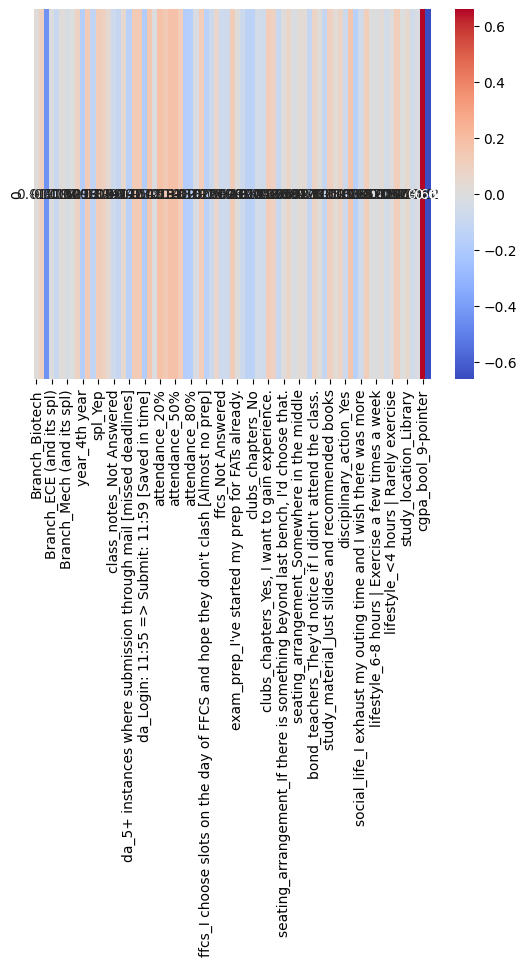

In [15]:
df_encoded = pd.get_dummies(df_preprocessed[cat])
corr_matrix = df_encoded.corrwith(df_preprocessed['cgpa']).to_frame().T

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [16]:
import plotly.express as px
import pandas as pd

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_preprocessed[cat])

# Compute correlation with target
corr_matrix = df_encoded.corrwith(df_preprocessed['cgpa']).to_frame(name="correlation")

# Reset index so categories become a column
corr_matrix = corr_matrix.reset_index().rename(columns={"index":"category"})

# Plot interactive heatmap
fig = px.imshow(
    corr_matrix.set_index("category").T, 
    color_continuous_scale="RdBu", 
    aspect="auto",
    title="Correlation of Categories with CGPA"
)

fig.update_layout(
    xaxis_title="Category (one-hot encoded)",
    yaxis_title="",
    coloraxis_colorbar=dict(title="Correlation")
)

fig.show()
